<a href="https://colab.research.google.com/github/onishiryo/ResProjLorenz/blob/main/lorenz63_step2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

================
Lorenz Chaos

Edward N. Lorenz(1963), `"Deterministic Nonperiodic Flow" https://doi.org/10.1175/1520-0469(1963)020%3C0130:DNF%3E2.0.CO;2

================
Step-2: Data Assimilation exercise

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # for projection='3d'
import pandas as pd # for file handling

# Lorenz 63 model
$$
\left\{
\begin{array}{lcl}
    \frac{dx}{dt} &=& \sigma (y-x) \\
    \frac{dy}{dt} &=& x(\rho -z) -y \\
    \frac{dz}{dt} &=& xy -\beta z
\end{array}
\right.
$$
$$ \sigma=10, \rho=28, \beta=8/3 $$

In [15]:
def lorenz_dot2(xyz):
    '''
    Given (input):
       (xyz[0],xyz[1],xyz[2])= (x,y,z)
    Given (defined):
       s, r, b: parameters for the lorenz system
    Returns:
       xyz_dot= (dx/dt,dy/dt,dz/dt): temporal derivatives
    '''
# parameters for lorenz system
    s= 10.0; r= 28.0; b= 8.0/3 

    xyz_dot =np.array([0.0, 0.0, 0.0])
    xyz_dot[0] = s*(xyz[1] - xyz[0])          #dx/dt=s*(y-x)
    xyz_dot[1] = xyz[0]*(r - xyz[2]) - xyz[1] #dy/dt=x*(r-z)-y
    xyz_dot[2] = xyz[0]*xyz[1] - b*xyz[2]     #dz/dt=x*y-b*z
    #
    return xyz_dot

In [20]:
def lorenz_system_integrate2(t, xyz0):
    # integration of ( nonlinear ) lorenz system with RK2
    #
    nstep= len(t)
    dt= t[1]-t[0] #time interval, dt
    xyz = np.zeros([nstep, 3]) #zero set
    xyz[0,:] = xyz0
    for n in range(nstep-1):
        k1 = lorenz_dot2(xyz[n]   )*dt*0.5
        k2 = lorenz_dot2(xyz[n]+k1)*dt
        xyz[n+1,:] = xyz[n,:] + k2        
    #
    print("final n =",n)
    return xyz

初期位置(x0,y0,z0)を設定する。

In [21]:
# Set initial values for lorenz system
t0= 0.0
xyz0= np.array([-1.34, -1.34, 18.1]) #(x0,y0,z0)

print("initial value(x0,y0,z0) =",xyz0[0],xyz0[1],xyz0[2])

initial value(x0,y0,z0) = -1.34 -1.34 18.1


In [22]:
# time setting
Tend= 10.0                   #end time
dt= 1.0e-3                   #time interval
nstep= int((Tend-t0)/dt+0.5) #number of time steps     
t= t0 + np.arange(0, nstep, 1)*dt #t[0:nstep]
print("Tend = ",Tend)
print("number of steps = ",nstep)

Tend =  10.0
number of steps =  10000


In [23]:
# calculate temporal evolution of position
##xt,yt,zt = lorenz_system_integrate(t, x0,y0,z0)
# prepare position vector: xyz[nstep,3]; x=xyz[:,0],y=xyz[:,1]),z=xyz[:,2]
xyz = np.zeros([nstep, 3]) #create & zero set
# calculate temporal evolution of position
xyz = lorenz_system_integrate2(t, xyz0)
print("Lorenz63 solved!")

final n = 9998
Lorenz63 solved!


In [24]:
xyz[:,0]

array([-1.34      , -1.34005963, -1.34023783, ...,  1.15022863,
        1.14375558,  1.13743363])

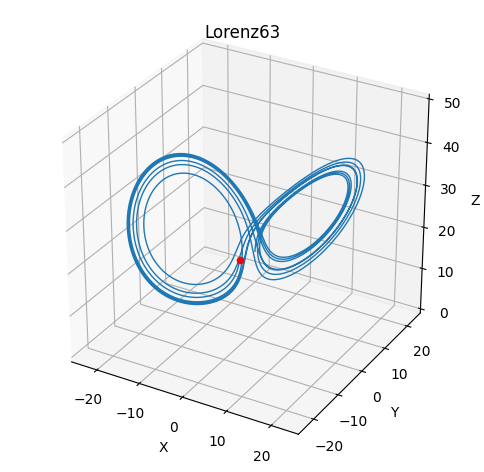

In [25]:
# make 3D Plot
fig= plt.figure(figsize=(6, 6), dpi=100)
ax = fig.gca(projection='3d')
# 描画のカスタマイズ
ax.set_title("Lorenz63")
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_xlim(-25, 25); ax.set_ylim(-25, 25); ax.set_zlim(  0, 50)

# show 3D trajectory figure
##ax.plot(xt[:], yt[:], zt[:], lw=1.0)
##ax.scatter(xt[0],yt[0],zt[0],color= 'red') #plot the initial position
ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], lw=1.0)
ax.scatter(xyz[0,0],xyz[0,1],xyz[0,2],color= 'red') #plot the initial position
plt.show()
fig.savefig("trajectory-3D.png")

得られたデータを使って、
draw_graph関数を設定した上で、2D描画する。

In [26]:
def draw_graph(tin1,varin1,text_label1,text_xaxis,text_yaxis,file):
#    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.plot(tin1,varin1,color="red", label=text_label1)
    plt.legend()
    plt.xlabel(text_xaxis)
    plt.ylabel(text_yaxis)
    plt.show()
    fig.savefig(file)

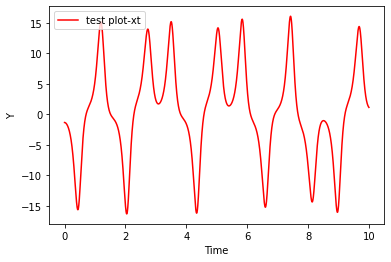

In [28]:
draw_graph(t,xyz[:,0],"test plot-xt","Time","Y","test-Yplot.png")

ファイル出力関数の設定

In [44]:
# file output using pandas library
##def write_data(t,x,y,z,file):
##    df = pd.DataFrame({'t':t, 'x':x, 'y':x, 'z':x})
def write_data2(t,xyz_out,file):
    df = pd.DataFrame({'t':t, 'x':xyz_out[:,0], 'y':xyz_out[:,1], 'z':xyz_out[:,2]})
    df.to_pickle(file)

ファイル出力：txyz_A.datとtxyz_B.dat

In [45]:
# output data -A
##write_data(t,xt,yt,zt,"txyz_A.dat")
write_data2(t,xyz,"txyz_A.dat")

In [46]:
# output data -B
##write_data(t,xt,yt,zt,"txyz_B.dat")
write_data2(t,xyz,"txyz_B.dat")

ファイル入力関数の設定

In [47]:
def read_data(file):
    print("read data from %s"%(file))
    df = pd.read_pickle(file)
    t = df[df.columns[0]].values
    x = df[df.columns[1]].values
    y = df[df.columns[2]].values
    z = df[df.columns[3]].values
    return t, x, y, z

ファイルからデータを読み込んで、描画する。

read data from txyz_A.dat


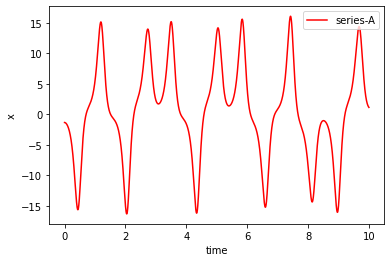

In [48]:
t_A,x_A,y_A,z_A=read_data("txyz_A.dat")
draw_graph(t_A,x_A,"series-A","time","x","A_x.png")

二つのファイルを読み込み、比較図を描画する。

In [49]:
def draw_comp_graph(tin1,varin1,tin2,varin2,text_label1,text_label2,text_xaxis,text_yaxis,file):
    import matplotlib.pyplot as plt
    fig_x = plt.figure()
    plt.plot(tin1,varin1,color="red", label=text_label1)
    plt.plot(tin2,varin2, 'o', ms=2,color="blue",label=text_label2)
    plt.legend()
    plt.xlabel(text_xaxis)
    plt.ylabel(text_yaxis)
    plt.show()
    fig_x.savefig(file)

read data from txyz_A.dat
read data from txyz_B.dat


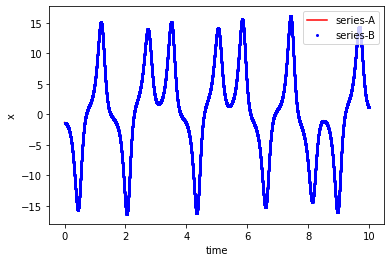

In [50]:
t_A,x_A,y_A,z_A=read_data("txyz_A.dat")
t_B,x_B,y_B,y_B=read_data("txyz_B.dat")
draw_comp_graph(t_A,x_A,t_B,x_B,"series-A","series-B","time","x","x_comp.png")

さて、いよいよデータ同化実験を始めます。


1.   観測データと真値データを作成
2.   データ同化と予測のサイクルを回す
3.   予測誤差を評価する



観測データ＝真値データ（txyz_A.dat）＋乱数ノイズ

*   データ同化の時間刻み：ΔT=ndelta*Δt（Delta=ndelta*dt）。
*   真値データ：txyz_A.datから読み込み。nstep個
*   観測データ：txyz_obs.datへ出力。データ同化の時間刻みと同じタイミングに観測されるので、nobs(=nstep/ndelta)個。
*   乱数ノイズ：大きさobs_noise



In [51]:
def output_obs_Delta(ndelta):
#ndelta: number of interval steps of obs frequency
#read txyz_A.dat and output txyz_obs.dat
    import numpy as np
    #setting
    obs_noise=3.0 #random noise to put
    
    #read data
    t_A,x_A,y_A,z_A=read_data("txyz_A.dat")
    nstep=len(t_A) #number of steps (number of lines of the data)
    print("nstep=%5d"%(nstep))
    dt=t_A[1]-t_A[0]
    Delta=ndelta*dt
    print("Delta=%5.2f"%(Delta))
    
    np.random.seed(seed=32) # set seed
    nobs=int(nstep/ndelta)
    print("ndim_new=%5d"%(nobs))
    t_obs = np.zeros([nobs])
    xyz_obs = np.zeros([nobs, 3])

    n_new=0
    for n in range(0,nstep-1,ndelta):
        err_obs= np.array([3])
        err_obs= np.random.normal(0.0, obs_noise, 3) #Gauss distribution with ave=0 & stdev=obs_noise
        t_obs[n_new] = t_A[n]
        xyz_obs[n_new,0] = x_A[n] + err_obs[0]
        xyz_obs[n_new,1] = y_A[n] + err_obs[1]
        xyz_obs[n_new,2] = z_A[n] + err_obs[2]
        n_new=n_new+1
        
    write_data2(t_obs,xyz_obs,"txyz_obs.dat")
    print("Completed: output obs data")

In [52]:
output_obs_Delta(1000)

read data from txyz_A.dat
nstep=10000
Delta= 1.00
ndim_new=   10
Completed: output obs data


確認、確認。

read data from txyz_obs.dat


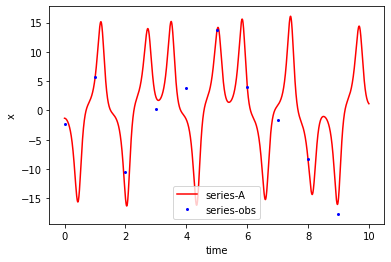

In [53]:
t_obs,x_obs,y_obs,z_obs=read_data("txyz_obs.dat")
draw_comp_graph(t_A,x_A,t_obs,x_obs,"series-A","series-obs","time","x","A-obs_x_comp.png")

データ同化と予測のサイクル、さらには誤差評価。誤差評価はデータ同化のタイミング（＝観測のタイミング、つまりndelta毎）にnobs回行う。

In [55]:
def assimilate_forecast(ndelta):
    """
    ndelta: number of interval steps of obs/forecast frequency
    in  txyz_A.dat  : truth
    out txyz_obs.dat: obs data at 'ndelta' interval
    out txyz_fc.dat : forecast data at 'ndelta' interval
    """
    import numpy as np
    #setting
    obs_noise=1.0 #random noise to put

    sig_obs = 1.0 #observation error (i.e., rms error)
    sig_fc  = 1.0 #forecast error
    
    #read data (truth)
    t_A,x_A,y_A,z_A=read_data("txyz_A.dat") #true values
    nstep=len(t_A) #number of steps (number of lines of the data)
    print("nstep=%5d"%(nstep))
    dt=t_A[1]-t_A[0]

    #data assimilation and forecast interval
    Delta=dt*ndelta
    print("Delta=%5.2f"%(Delta))
    
    np.random.seed(seed=32) # set seed for random
#    nobs=int(nstep/ndelta)
    nobs=int(np.ceil(nstep/ndelta)) #e.g., int(ceil((10/3)) =>4
    print("ndim_new (i.e., nobs)=%5d"%(nobs))
    t_obs   = np.zeros([nobs])
    xyz_true= np.zeros([nobs, 3]) #true values    
    xyz_obs = np.zeros([nobs, 3]) #observation values    
    xyz_assim=np.zeros([nobs, 3]) #assimilated values
    xyz_fc   =np.zeros([nobs, 3]) #forecast values

    n_new=0
    xyz_fc[0,:]=(x_A[0],y_A[0],z_A[0]) #for initial data assimilation
    #
    for n in range(0,nstep-1,ndelta):
        xyz_true[n_new,0] = x_A[n]
        xyz_true[n_new,1] = y_A[n]
        xyz_true[n_new,2] = z_A[n]

        #prepare observation data
        t_obs[n_new] = t_A[n]
        err_obs= np.array([3])
        err_obs= np.random.normal(0.0, obs_noise, 3) #Gauss distribution with ave=0 & stdev=obs_noise
        xyz_obs[n_new,0] = xyz_true[n_new,0] + err_obs[0] #obs=true+error
        xyz_obs[n_new,1] = xyz_true[n_new,1] + err_obs[1]
        xyz_obs[n_new,2] = xyz_true[n_new,2] + err_obs[2]
        
        #data assimilation
        xyz_assim[n_new,:]=(sig_fc**2 *xyz_obs[n_new,:] +sig_obs**2 * xyz_fc[n_new,:])/(sig_fc**2+sig_obs**2)
        
        #forecast process (temporal integration)
        # integration of lorenz system with RK
#        s = 10.0; r = 28.0; b = 8.0/3
        x = np.zeros([ndelta, 3]) #zero set
        x[0,:] = (xyz_assim[n_new,0],xyz_assim[n_new,1],xyz_assim[n_new,2]) #initial
        # RK2
        for n in range(ndelta-1):
            k1 = lorenz_dot2(x[n]   )*dt*0.5
            k2 = lorenz_dot2(x[n]+k1)*dt
            x[n+1,:] = x[n,:] + k2        

        if n_new+1<nobs: #to avoid n_new+1>nobs
            xyz_fc[n_new+1,:]=x[ndelta-1,:] #forecast end (next data assimilation timing)
        #
        n_new=n_new+1

#rms error 
    rmse_obs  =rms_error3d(xyz_obs  ,xyz_true)
    rmse_fc   =rms_error3d(xyz_fc   ,xyz_true)
    rmse_assim=rms_error3d(xyz_assim,xyz_true)
    print("rms error of observation data=%5.2f"%(rmse_obs))
    print("rms error of forecast data   =%5.2f"%(rmse_fc))
    print("rms error of assimilated data=%5.2f"%(rmse_assim))
    
    write_data(t_obs,xyz_true ,"txyz_true.dat")
    write_data(t_obs,xyz_obs  ,"txyz_obs.dat")
    write_data(t_obs,xyz_fc   ,"txyz_fc.dat")
    write_data(t_obs,xyz_assim,"txyz_assim.dat")

    print("Completed: assimilate & forecast")

def rms_error3d(x,xref):
    rmse = np.sqrt(np.average((x-xref)**2)) #calculate rms value

    return rmse


In [63]:
assimilate_forecast(300)

read data from txyz_A.dat
nstep=10000
Delta= 0.30
ndim_new (i.e., nobs)=   34
rms error of observation data= 1.03
rms error of forecast data   = 2.73
rms error of assimilated data= 1.44
Completed: assimilate & forecast


真値と予測結果の比較

read data from txyz_fc.dat


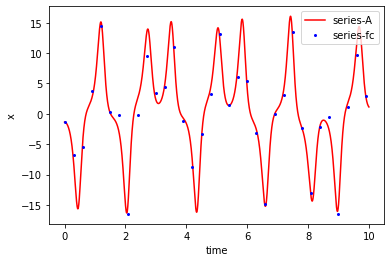

In [64]:
t_fc,x_fc,y_fc,z_fc=read_data("txyz_fc.dat")
draw_comp_graph(t_A,x_A,t_fc,x_fc,"series-A","series-fc","time","x","A-fc_x_comp.png")

真値と解析値（データ同化結果）の比較

read data from txyz_assim.dat


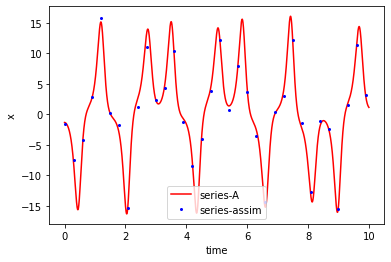

In [65]:
t_assim,x_assim,y_assim,z_assim=read_data("txyz_assim.dat")
draw_comp_graph(t_A,x_A,t_assim,x_assim,"series-A","series-assim","time","x","A-assim_x_comp.png")